In [3]:
import torch
import torch.nn as nn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

## Dataset Setup

In [4]:
final_df = pd.read_parquet("../dataset/combined.parquet")
final_df = final_df.dropna(axis=0)

In [5]:
final_df = final_df[["audio_filepath", "duration" ,"text"]]
final_df = final_df[final_df["duration"] > 2]
final_df.head(3)
len(final_df)

4872

## Characters and Preprocessing

In [6]:
characters = [x for x in "abcdefghijklmnopqrstuvwxyz' "]

char_to_idx = {char: idx for idx, char in enumerate(characters)}
idx_to_char = {idx: char for char, idx in char_to_idx.items()}

#OOV token handling
oov_token = len(characters)  # next index for out-of-vocabulary
char_to_idx_default = lambda c: char_to_idx.get(c, oov_token)

#string to indices
def text_to_indices(text):
    return torch.tensor([char_to_idx_default(c) for c in text], dtype=torch.long)

#Convert indices back to text
def indices_to_text(indices):
    return ''.join([idx_to_char.get(idx.item(), '') for idx in indices])

In [7]:
input_text = "shivansh"
encoded = text_to_indices(input_text)
print("Encoded:", encoded)

decoded = indices_to_text(encoded)
print("Decoded:", decoded)

Encoded: tensor([18,  7,  8, 21,  0, 13, 18,  7])
Decoded: shivansh


## Pre-Processing

In [8]:
import torchaudio
import re
import random
import io

In [15]:
def plot_waveform(wav, sample_rate):
        num_channels, num_frames = wav.shape
        time_axis = torch.arange(0, num_frames) / sample_rate

        figure, axes = plt.subplots(num_channels, 1)
        if num_channels == 1:
            axes = [axes]
        for c in range(num_channels):
            axes[c].plot(time_axis, wav[c], linewidth=1)
            axes[c].grid(True)
            if num_channels > 1:
                axes[c].set_ylabel(f"Channel {c+1}")
        figure.suptitle("Testing Waveform")

In [9]:
# An integer scalar Tensor. The window length in samples.
frame_length = 256
# An integer scalar Tensor. The number of samples to step.
frame_step = 160
# An integer scalar Tensor. The size of the FFT to apply.
# If not provided, uses the smallest power of 2 enclosing frame_length.
fft_length = 384

In [16]:
def load_audio():
    for i in final_df["audio_filepath"].values:
        audio_bytes = i["bytes"]
        wav, sr = torchaudio.load(io.BytesIO(audio_bytes))
        plot_waveform(wav, sr)
        break

        

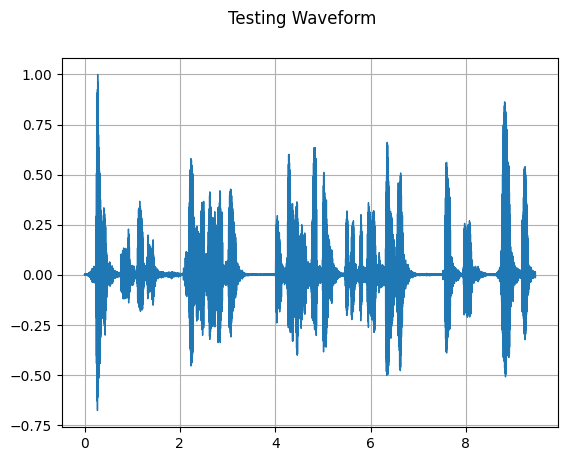

In [17]:
load_audio()